In [22]:
# Titanic Dataset - Full EDA

# 1. Imports and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [24]:
# 2. Basic Data Inspection
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2.

In [25]:
# 3. Info and Describe
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [26]:
# 4. Missing Values Analysis
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_summary = pd.DataFrame({'missing_count': missing, 'missing_percent': missing_percent})
print("Missing Data:\n", missing_summary)

Missing Data:
              missing_count  missing_percent
PassengerId              0         0.000000
Survived                 0         0.000000
Pclass                   0         0.000000
Name                     0         0.000000
Sex                      0         0.000000
Age                    177        19.865320
SibSp                    0         0.000000
Parch                    0         0.000000
Ticket                   0         0.000000
Fare                     0         0.000000
Cabin                  687        77.104377
Embarked                 2         0.224467


In [27]:
# 5. Univariate Analysis
# Target variable (Survived)
surv_counts = df['Survived'].value_counts()
surv_rate = df['Survived'].mean()
print(f"Survival Rate: {surv_rate:.2%}")

Survival Rate: 38.38%


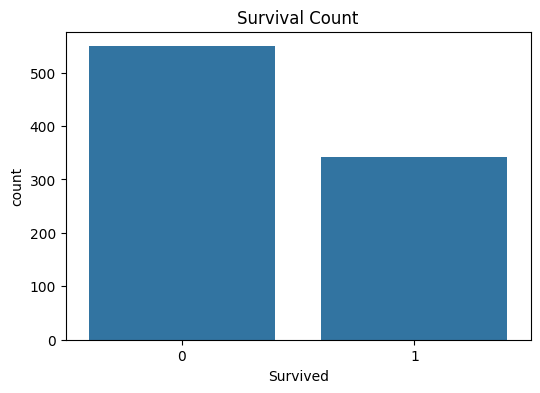

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

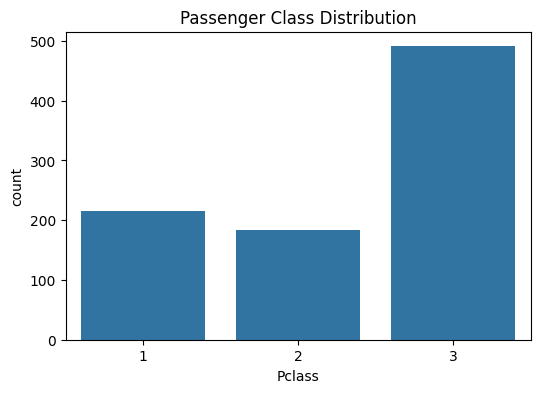

In [29]:
# Pclass
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

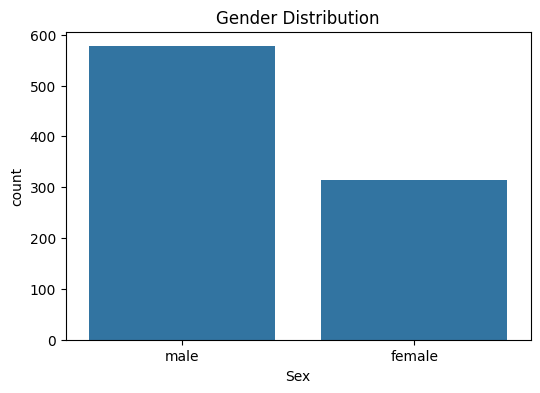

In [30]:
# Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

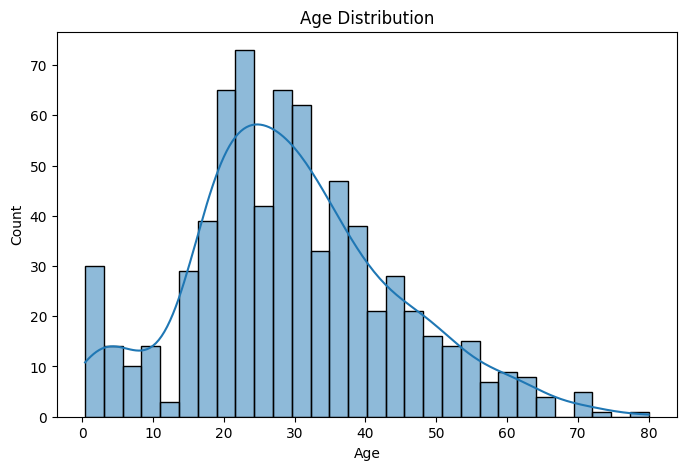

In [31]:
# Age (with missing)
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

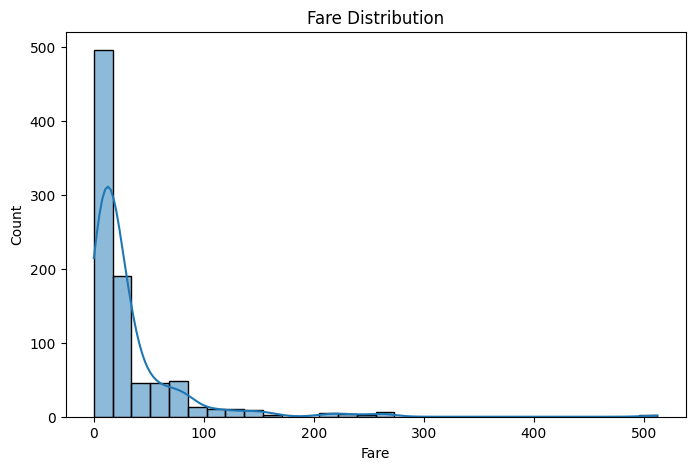

In [32]:
# Fare
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

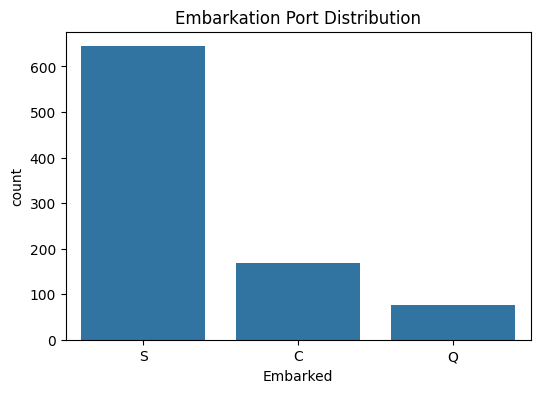

In [33]:
# 6. Categorical Features
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', data=df)
plt.title('Embarkation Port Distribution')
plt.show()

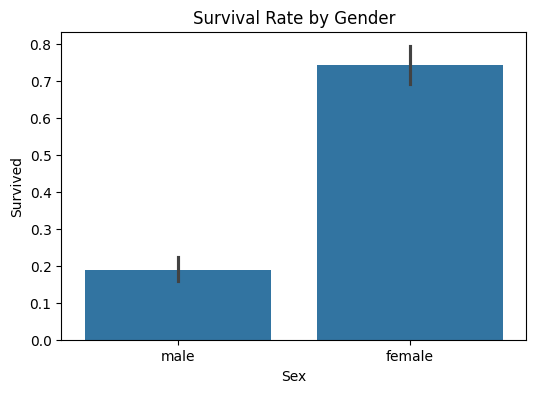

In [34]:
# 7. Bivariate Analysis
# Survival by Sex
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

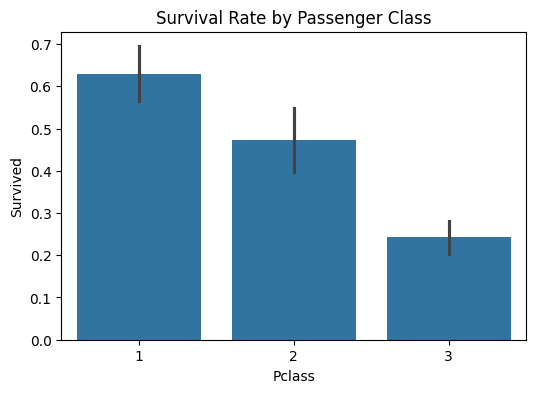

In [35]:
# Survival by Pclass
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

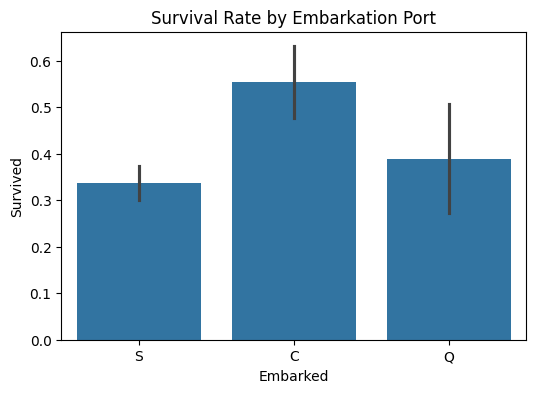

In [36]:
# Survival by Embarked
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12256\2524013367.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived']==1]['Age'].dropna(), label='Survived', shade=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12256\2524013367.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived']==0]['Age'].dropna(), label='Did Not Survive', shade=True)


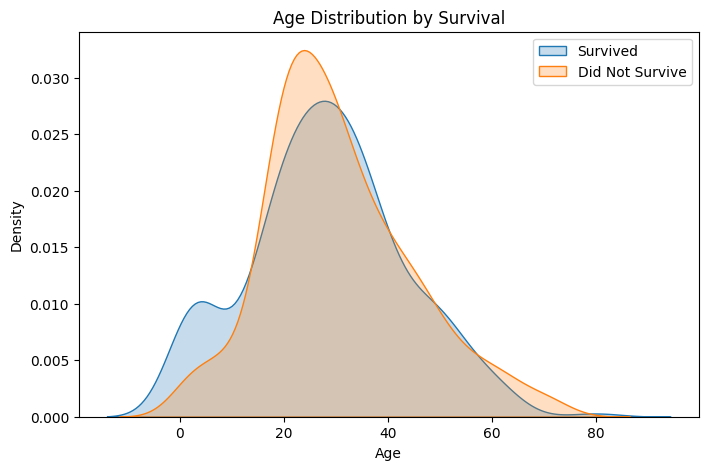

In [37]:
# Survival by Age (curve)
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Survived']==1]['Age'].dropna(), label='Survived', shade=True)
sns.kdeplot(df[df['Survived']==0]['Age'].dropna(), label='Did Not Survive', shade=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.legend()
plt.show()

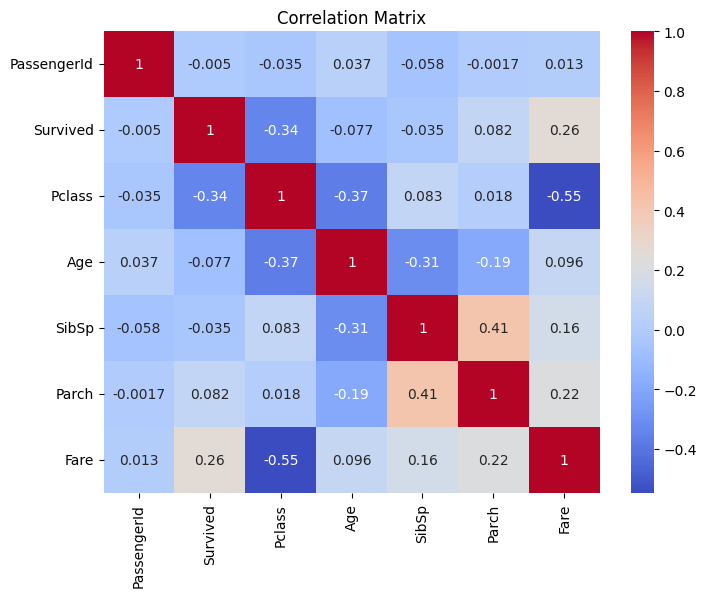

In [38]:
# 8. Correlation Analysis
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

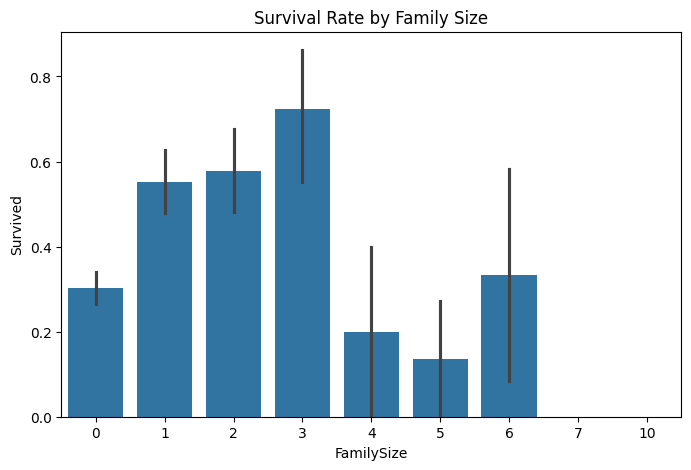

In [39]:
# 9. Feature Engineering Examples
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(8,5))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

In [40]:
# 10. Cabin and Ticket Features
print("Number of unique Cabin entries:", df['Cabin'].nunique())
print("Number of unique Ticket entries:", df['Ticket'].nunique())

Number of unique Cabin entries: 147
Number of unique Ticket entries: 681


In [41]:
# Data Preprocessing
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df['FamilySize'] = df['SibSp'] + df['Parch']

In [42]:
# Features and Target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC AUC Score: 0.8828828828828829
